In [1]:
import pandas as pd

# Load the dataset
file_path = 'cleaned_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe and the column names
data.head(), data.columns


(   Unnamed: 0           State           City  Population  V_crime  Murder  \
 0           7  SOUTH CAROLINA       DUE WEST      1240.0        0     0.0   
 1          17  SOUTH CAROLINA  CALHOUN FALLS      1912.0       14     2.0   
 2          27  SOUTH CAROLINA      ABBEVILLE      5017.0       47     9.0   
 3          35       LOUISIANA   CHURCH POINT      4424.0       39     1.0   
 4          45       LOUISIANA        CROWLEY     12621.0      158     1.0   
 
    Rape  Robbery  Aggravated assault  Property crime  ...  housing_cost  \
 0     0        0                   0              18  ...        8148.0   
 1     0        0                  12              31  ...        8148.0   
 2     4        4                  30             123  ...        8148.0   
 3     1        0                  37              78  ...        8700.0   
 4     8       14                 135             528  ...        8700.0   
 
     food_cost  transportation_cost healthcare_cost other_necessities_co

In [2]:
import numpy as np

# Retry selecting only numeric columns for correlation matrix calculation
numeric_data = data.select_dtypes(include=[np.number])

# Now compute the correlation matrix again
numeric_correlation_matrix = numeric_data.corr()

# Display the correlation matrix
numeric_correlation_matrix


,Unnamed: 0,Population,V_crime,Murder,Rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,...,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,taxes,total_cost,median_family_income,Total Crimes,Crime Rate
Unnamed: 0,1.000000,0.011729,0.004849,-0.006038,0.000696,-0.001314,0.008387,0.004361,0.008357,0.003245,...,0.048034,0.020358,0.140264,0.030628,0.045597,0.071639,0.064878,0.044836,0.004515,-0.004267
Population,0.011729,1.000000,0.942967,0.726414,0.918845,0.917089,0.940907,0.897943,0.773869,0.923135,...,0.136328,0.141568,-0.142998,-0.034403,0.145300,0.121158,0.128019,0.072272,0.917261,0.000758
V_crime,0.004849,0.942967,1.000000,0.877213,0.943539,0.979634,0.995681,0.941285,0.871431,0.945763,...,0.084086,0.094620,-0.130763,-0.025699,0.091004,0.077895,0.077945,0.037095,0.964114,0.004188
Murder,-0.006038,0.726414,0.877213,1.000000,0.811398,0.872353,0.864284,0.834421,0.834899,0.813818,...,0.056913,0.055291,-0.105738,-0.029895,0.059936,0.046862,0.047336,0.024630,0.852585,0.004829
Rape,0.000696,0.918845,0.943539,0.811398,1.000000,0.902524,0.938011,0.948768,0.885188,0.945182,...,0.093934,0.087775,-0.111673,-0.039400,0.098263,0.077528,0.081738,0.043242,0.957356,0.003891
Robbery,-0.001314,0.917089,0.979634,0.872353,0.902524,1.000000,0.958195,0.929096,0.862316,0.930420,...,0.096642,0.103167,-0.124238,-0.026594,0.103535,0.088456,0.088790,0.047243,0.949968,0.003905
Aggravated assault,0.008387,0.940907,0.995681,0.864284,0.938011,0.958195,1.000000,0.926911,0.855042,0.934216,...,0.075578,0.089911,-0.133545,-0.023063,0.082719,0.071709,0.071147,0.030935,0.951843,0.004248
Property crime,0.004361,0.897943,0.941285,0.834421,0.948768,0.929096,0.926911,1.000000,0.950392,0.993183,...,0.120918,0.108855,-0.112993,-0.039114,0.125706,0.094770,0.102178,0.056995,0.997139,0.007710
Burglary,0.008357,0.773869,0.871431,0.834899,0.885188,0.862316,0.855042,0.950392,1.000000,0.911789,...,0.100469,0.074238,-0.074585,-0.043531,0.101373,0.063934,0.073774,0.039941,0.942487,0.007686
Larceny-theft,0.003245,0.923135,0.945763,0.813818,0.945182,0.930420,0.934216,0.993183,0.911789,1.000000,...,0.121843,0.117906,-0.127440,-0.035233,0.128226,0.101116,0.107334,0.060048,0.992780,0.007696


In [3]:
data = data.dropna(subset=['Crime Rate'])

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting the relevant variables for the regression model
X = data[['housing_cost', 'taxes', 'other_necessities_cost', 'median_family_income','Crime Rate']]
y = data['total_cost']

# Splitting the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating the model performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(7007533.612072078, 0.9680342280282986)

In [5]:
# Getting the coefficients from the model
coefficients = model.coef_

# Creating a DataFrame to display variable names and their corresponding coefficients
coefficients_df = pd.DataFrame(data={'Variable': X.columns, 'Coefficient': coefficients})
# Extracting the intercept from the model
intercept = model.intercept_




coefficients_df , intercept


(                 Variable  Coefficient
 0            housing_cost    -0.458461
 1                   taxes     2.416455
 2  other_necessities_cost     3.594878
 3    median_family_income     0.053377
 4              Crime Rate   -37.883888,
 34349.053143222605)

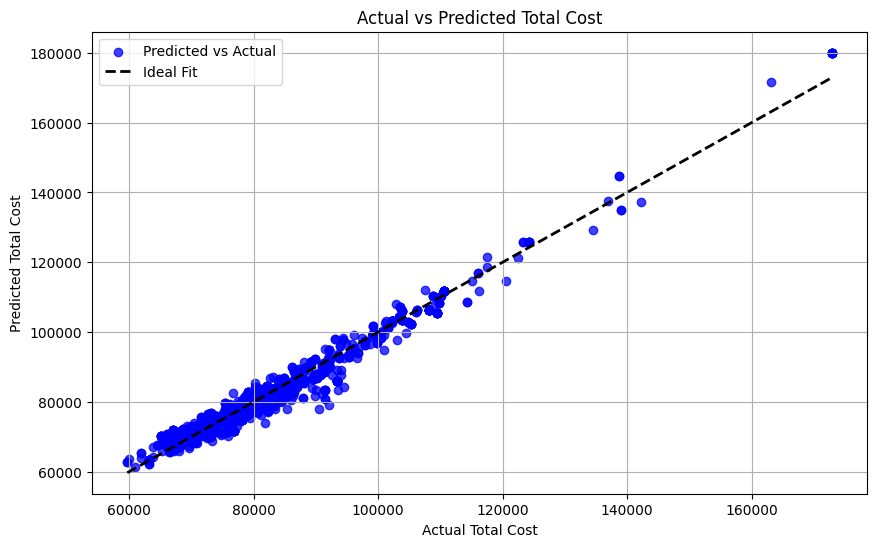

In [6]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.75, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Ideal Fit')

# Labeling the plot
plt.xlabel('Actual Total Cost')
plt.ylabel('Predicted Total Cost')
plt.title('Actual vs Predicted Total Cost')
plt.legend()
plt.grid(True)

plt.show()


____________________Regularization and cross validation_______________________

In [8]:
#@title Using Ridge Regression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Preparing the data
X = data[['housing_cost', 'taxes', 'other_necessities_cost', 'median_family_income', 'Crime Rate']]
y = data['total_cost']

# Impute missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Initialize the Ridge regression model
ridge_model = Ridge(alpha=1.0)

# Setup k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
ridge_scores = cross_val_score(ridge_model, X_imputed, y, cv=kf, scoring='r2')
print("Cross-validated R^2 scores:", ridge_scores)
print("Average R^2 score:", ridge_scores.mean())


Cross-validated R^2 scores: [0.96803423 0.96229185 0.96344126 0.96660528 0.96597062]
Average R^2 score: 0.9652686480582691


In [14]:
#@Using Lasso Regression

from sklearn.linear_model import Lasso

# Initialize the Lasso regression model
lasso_model = Lasso(alpha=0.1)

# Perform cross-validation
lasso_scores = cross_val_score(lasso_model, X_imputed, y, cv=kf, scoring='r2')
print("Cross-validated R^2 scores:", lasso_scores)
print("Average R^2 score:", lasso_scores.mean())


Cross-validated R^2 scores: [0.96803421 0.96229185 0.96344437 0.96660527 0.96597062]
Average R^2 score: 0.9652692639804037


In [12]:
#@Using Elastic Net Regression
from sklearn.linear_model import ElasticNet

# Initialize the Elastic Net model
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Perform cross-validation
elastic_net_scores = cross_val_score(elastic_net_model, X_imputed, y, cv=kf, scoring='r2')
print("Cross-validated R^2 scores:", elastic_net_scores)
print("Average R^2 score:", elastic_net_scores.mean())


Cross-validated R^2 scores: [0.96803399 0.96229173 0.96353097 0.96660507 0.96597057]
Average R^2 score: 0.9652864628373369
